In [1]:
import sys
path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY' # PC notebook luiz
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
# path = r'C:\Users\UFG\Documents\github\PAREPY' # PC branco wander
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import numpy as np
from obj_function import ishigami
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel

def sobol_algorithm(setup):
    n_samples = setup['number of samples']
    obj = setup['objective function']
    none_variable = setup['none variable']

    dist_a = sampling_algorithm_structural_analysis_kernel(setup)
    dist_b = sampling_algorithm_structural_analysis_kernel(setup)
    y_a = dist_a['G_0'].to_list()
    y_b = dist_b['G_0'].to_list()
    f_0_2 = (sum(y_a) / n_samples) ** 2

    A = dist_a.drop(['R_0', 'S_0', 'G_0', 'I_0'], axis=1).to_numpy()
    B = dist_b.drop(['R_0', 'S_0', 'G_0', 'I_0'], axis=1).to_numpy()
    K = A.shape[1]

    s_i = []
    s_t = []
    p_e = []
    for i in range(K):
        C = np.copy(B) 
        C[:, i] = A[:, i]
        y_c_i = []
        for j in range(n_samples):
            _, _, g = obj(list(C[j, :]), none_variable)
            y_c_i.append(g[0])  
        
        y_a_dot_y_c_i = [y_a[m] * y_c_i[m] for m in range(n_samples)]
        y_b_dot_y_c_i = [y_b[m] * y_c_i[m] for m in range(n_samples)]
        y_a_dot_y_a = [y_a[m] * y_a[m] for m in range(n_samples)]
        s_i.append((1/n_samples * sum(y_a_dot_y_c_i) - f_0_2) / (1/n_samples * sum(y_a_dot_y_a) - f_0_2))
        s_t.append(1 - (1/n_samples * sum(y_b_dot_y_c_i) - f_0_2) / (1/n_samples * sum(y_a_dot_y_a) - f_0_2))

    s_i = [float(i) for i in s_i]
    s_t = [float(i) for i in s_t]
    dict_sobol = pd.DataFrame(
        {'s_i': s_i,
         's_t': s_t}
    )

    return dict_sobol

# Dataset
f = {'type': 'uniform', 'parameters': {'min': -3.14, 'max': 3.14}, 'stochastic variable': False}
p = {'type': 'uniform', 'parameters': {'min': -3.14, 'max': 3.14}, 'stochastic variable': False}
w = {'type': 'uniform', 'parameters': {'min': -3.14, 'max': 3.14}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 50000, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'lhs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': ishigami,
             'name simulation': None,
        }

# Call algorithm
data_sobol = sobol_algorithm(setup)
data_sobol

from tabulate import tabulate
print(tabulate(data_sobol, headers='keys', tablefmt='psql'))

+----+------------+----------+
|    |        s_i |      s_t |
|----+------------+----------|
|  0 | 0.316759   | 0.562809 |
|  1 | 0.445146   | 0.447611 |
|  2 | 0.00298471 | 0.248114 |
+----+------------+----------+


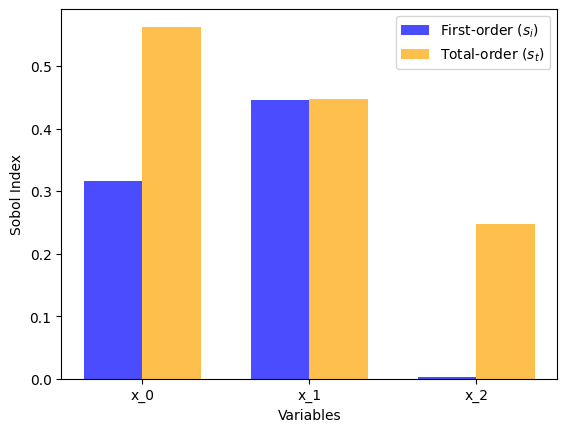

In [3]:
# Libraries
import matplotlib.pyplot as plt

# Extract values
variables = ['x_0', 'x_1', 'x_2']
s_i = [data_sobol.iloc[var]['s_i'] for var in range(len(variables))]
s_t = [data_sobol.iloc[var]['s_t'] for var in range(len(variables))]

# Plot bar chart for Sobol indices
x = range(len(variables))
width = 0.35

plt.bar(x, s_i, width, label='First-order ($s_i$)', color='blue', alpha=0.7)
plt.bar([p + width for p in x], s_t, width, label='Total-order ($s_t$)', color='orange', alpha=0.7)

plt.xlabel("Variables")
plt.ylabel("Sobol Index")
plt.xticks([p + width / 2 for p in x], variables)
plt.legend()
plt.show()


In [4]:
# Save results to a CSV file
data_sobol.to_excel('sobol_indices.xlsx', index=False)

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.hist(a['G_0'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('G_0')
plt.show()

plt.hist(a['X_0'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_0')
plt.show()

plt.hist(a['X_1'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_1')
plt.show()


plt.hist(a['X_2'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_2')
plt.show()

plt.scatter(a['X_0'], a['G_0'], alpha=0.7)
plt.xlabel('$x_0$')
plt.ylabel('ishigami')
plt.grid(True)
plt.show()

plt.scatter(a['X_1'], a['G_0'], alpha=0.7)
plt.xlabel('$x_1$')
plt.ylabel('ishigami')
plt.grid(True)
plt.show()

plt.scatter(a['X_2'], a['G_0'], alpha=0.7)
plt.xlabel('$x_2$')
plt.ylabel('ishigami')
plt.grid(True) 
plt.show()


NameError: name 'a' is not defined

<Figure size 1000x600 with 0 Axes>